In [1]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=293152 sha256=a9ff4232a03f20b8433fd40a42a6f354d3cbe890ff7f36b7829d17737b246b3d
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee


In [2]:
import yfinance as yf
stock_symbol = 'AAPL'  # Replace with the desired stock symbol
start_date = '2023-01-01'
end_date = '2024-01-01'
try:
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data.to_csv('stock_data.csv')
    print("Stock data saved successfully.")
except Exception as e:
    print("Error occurred:", e)


[*********************100%%**********************]  1 of 1 completed

Stock data saved successfully.


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216286,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497505,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [4]:
import numpy as np

# Calculate log returns
stock_data['Log Return'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))

# Drop the first row with NaN
stock_data = stock_data.dropna()

# Calculate the standard deviation of log returns
volatility = stock_data['Log Return'].std() * np.sqrt(252)
print(f"Annual volatility: {volatility:.4f}")

Annual volatility: 0.1992


In [6]:
# import numpy as np

# # Function to calculate option price using Binomial model
def binomial_option_price(S, K, T, r, sigma, option_type='call', steps=1000):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Initialize arrays to store stock prices and option values
    stock_prices = np.zeros(steps + 1)
    option_values = np.zeros(steps + 1)
    
    # Calculate stock prices at each node
    for i in range(steps + 1):
        stock_prices[i] = S * (u ** (steps - i)) * (d ** i)
    
    # Calculate option values at maturity
    for i in range(steps + 1):
        if option_type == 'call':
            option_values[i] = max(0, stock_prices[i] - K)
        elif option_type == 'put':
            option_values[i] = max(0, K - stock_prices[i])
    
    # Backward induction to calculate option values at earlier nodes
    for j in range(steps, 0, -1):  # current level 
        for i in range(j):  # iterating on number of unique possible values
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
#         option_values[i] = np.exp(-r * dt)
    
    return option_values[0]



In [ ]:
# import numpy as np

# # Function to calculate American option price using Binomial model
def binomial_option_price_american(S, K, T, r, sigma, option_type='call', steps=1000):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Initialize arrays to store stock prices and option values
    stock_prices = np.zeros(steps + 1)
    option_values = np.zeros(steps + 1)
    
    # Calculate stock prices at each node
    for i in range(steps + 1):
        stock_prices[i] = S * (u ** (steps - i)) * (d ** i)
    
    # Calculate option values at maturity
    for i in range(steps + 1):
        if option_type == 'call':
            option_values[i] = max(0, stock_prices[i] - K)
        elif option_type == 'put':
            option_values[i] = max(0, K - stock_prices[i])
    
    # Backward induction to calculate option values at earlier nodes
    for j in range(steps, 0, -1):  # current level 
        for i in range(j):  # iterating on number of unique possible values
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            initial_val = S * (u ** (j - i)) * (d ** i)
            if option_type == 'call':
                initial_val = max(0, initial_val - K)
            elif option_type == 'put':
                initial_val = max(0, K - initial_val)
            option_values[i] = max(initial_val, option_values[i])
    
    return option_values[0]


 
    

In [7]:
S = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = 0.01  # Risk-free interest rate (10 years' US Treasury rate)
sigma = volatility  # Annual volatility (calculated previously)
steps = 4
T = 90/365
K = 230
call_price = binomial_option_price(S, K, T, r, sigma, option_type='call', steps=steps)
print("Call Price: ", call_price)

Call Price:  0.25833781196016


Text(0.5, 1.0, 'Varying Strike Price')

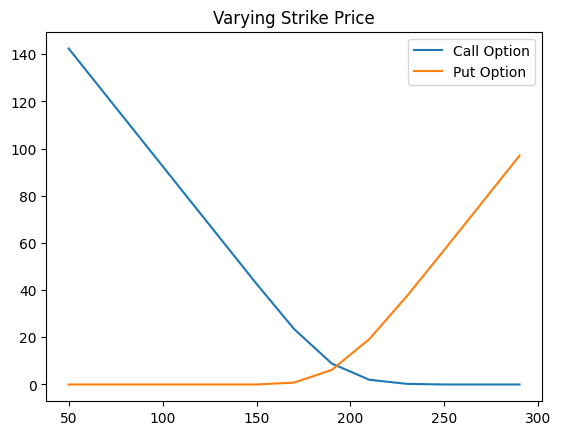

In [8]:
import matplotlib.pyplot as plt
call_prices = [binomial_option_price(S, k, T, r, sigma, option_type='call', steps=steps) for k in range(50, 300, 20)]
put_prices = [binomial_option_price(S, k, T, r, sigma, option_type='put', steps=steps) for k in range(50, 300, 20)]
plt.plot(range(50, 300, 20), call_prices, label = "Call Option")
plt.plot(range(50, 300, 20), put_prices, label = "Put Option")
plt.legend()
plt.title("Varying Strike Price")

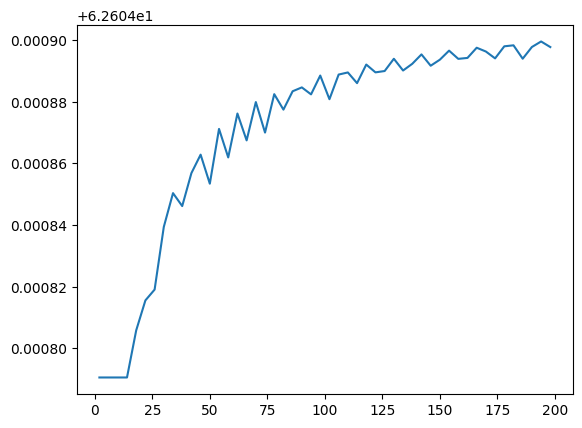

In [9]:
S = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = 0.01  # Risk-free interest rate (10 years' US Treasury rate)
sigma = volatility  # Annual volatility (calculated previously)
T = 90/365
K = 130
call_prices = [binomial_option_price(S, K, T, r, sigma, option_type='call', steps=steps) for steps in range(2, 200, 4)]
plt.plot(range(2, 200, 4), call_prices, label = "Call Option")


In [10]:
S = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = 0.01  # Risk-free interest rate (10 years' US Treasury rate)
sigma = volatility  # Annual volatility (calculated previously)
steps = 1000  # Number of steps for the Binomial model

# Define different strike prices and times to maturity
strike_prices = [120, 125, 200, 250]  # Example strike prices
maturities = [30/365, 60/365, 90/365]  # Example times to maturity in years (converted from days)

# Evaluate option prices for each combination of strike price and time to maturity
for K in strike_prices:
    for T in maturities:
        call_price = binomial_option_price(S, K, T, r, sigma, option_type='call', steps=steps)
        put_price = binomial_option_price(S, K, T, r, sigma, option_type='put', steps=steps)
        print(f"For strike price ${K} and time to maturity {T*365} days:")
        print(f"Call option price: ${call_price:.2f}")
        print(f"Put option price: ${put_price:.2f}")
        print()

For strike price $120 and time to maturity 30.0 days:
Call option price: $72.38
Put option price: $0.00

For strike price $120 and time to maturity 60.0 days:
Call option price: $72.48
Put option price: $0.00

For strike price $120 and time to maturity 90.0 days:
Call option price: $72.58
Put option price: $0.00

For strike price $125 and time to maturity 30.0 days:
Call option price: $67.39
Put option price: $0.00

For strike price $125 and time to maturity 60.0 days:
Call option price: $67.49
Put option price: $0.00

For strike price $125 and time to maturity 90.0 days:
Call option price: $67.59
Put option price: $0.00

For strike price $200 and time to maturity 30.0 days:
Call option price: $1.67
Put option price: $9.22

For strike price $200 and time to maturity 60.0 days:
Call option price: $3.30
Put option price: $10.68

For strike price $200 and time to maturity 90.0 days:
Call option price: $4.65
Put option price: $11.87

For strike price $250 and time to maturity 30.0 days:
Ca

In [11]:
from scipy.stats import norm
def black_scholes_call(S, X, T, r, sigma):
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * (T)) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - X * np.exp(-r * (T)) * norm.cdf(d2)
    return call_price

def black_scholes_put(S, X, T, r, sigma):
    call_price = black_scholes_call(S, X, T, r, sigma)
    value = S - X * (np.exp(-r*T))
    return call_price - value  # Ce - Pe = V(0)

In [12]:
S = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = 0.01  
sigma = volatility  
steps = 4
T = 90/365
K = 230
call_price = black_scholes_call(S, K, T, r, sigma)
print("Call Option Price using: ", call_price)
put_price = black_scholes_put(S, K, T, r, sigma)
print("Put Option Price using: ", put_price)

Call Option Price using:  0.30731004234677073
Put Option Price using:  37.45624792227285


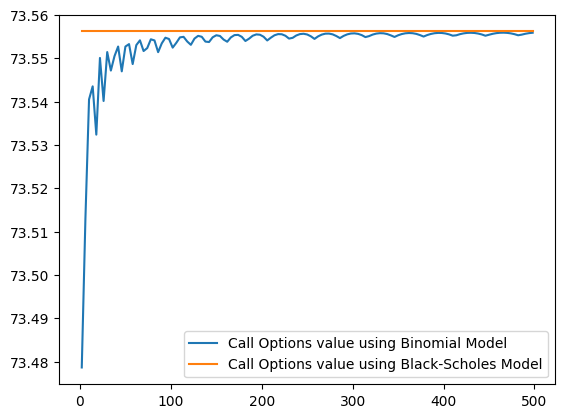

In [13]:
S = stock_data['Adj Close'].iloc[-1]  # Current stock price
r = 0.01  # Risk-free interest rate (10 years' US Treasury rate)
sigma = volatility  # Annual volatility (calculated previously)
# T = 150/365
T = 1
K = 120
step_range = range(2, 500, 4)
call_prices = [binomial_option_price(S, K, T, r, sigma, option_type='call', steps=steps) for steps in step_range]
plt.plot(step_range, call_prices, label = "Call Options value using Binomial Model")
blackScholes_callPrice = black_scholes_call(S, K, T, r, sigma)
plt.plot(step_range, np.ones(len(call_prices)) * blackScholes_callPrice, label = "Call Options value using Black-Scholes Model")
plt.legend()

In [17]:
def calculate_delta(S, X, T, r, sigma, option_type='call'):
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * (T)) / (sigma * np.sqrt(T))
    if option_type == 'call':
        delta = norm.cdf(d1)
    else:  # for put options
        delta = norm.cdf(d1) - 1
    return delta



In [18]:

def construct_portfolio(call_strike, put_strike, underlying_price, call_price, put_price, r, T, sigma):

    call_d = calculate_delta(underlying_price, call_strike, T, r, sigma, 'call')
    put_d = calculate_delta(underlying_price, put_strike, T, r, sigma, 'option')

    call_quantity = -put_d * call_price / call_d
    put_quantity = -call_d * put_price / put_d

    return call_quantity, put_quantity

call_strike = 110  
put_strike = 90   
underlying_price = 100   
call_price = 5     
put_price = 4      
r = 0.05            
T = 1               
sigma = 0.2         


call_quantity, put_quantity = construct_portfolio(call_strike, put_strike, underlying_price, call_price, put_price, r, T, sigma)


print("Call Option Quantity:", call_quantity)
print("Put Option Quantity:", put_quantity)


Call Option Quantity: 2.116065995843086
Put Option Quantity: 9.451501058704725


In [19]:
from scipy.stats import norm
from scipy.optimize import newton

def black_scholes_call(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def implied_volatility(call_price, S, K, r, T):
    
    def f(sigma):
        return black_scholes_call(S, K, r, T, sigma) - call_price
    
    # Newton's method to find the root
    implied_vol = newton(f, x0=0.2)  # Initial guess for volatility (e.g., 0.2)
    return implied_vol


call_price = 5.25   
S = 100             
K = 100            
r = 0.05            
T = 1               

implied_vol = implied_volatility(call_price, S, K, r, T)
print("Implied Volatility:", implied_vol)


Implied Volatility: 0.048568973004661835
